
<p align="center">
  <img src="https://storage.googleapis.com/kaggle-datasets-images/2243/3791/9384af51de8baa77f6320901f53bd26b/dataset-cover.png" />
  Image source: https://www.kaggle.com/
</p>

## Stage 1: Installing dependencies 

## Stage 2: Import dependencies for the project

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

## Stage 3: Dataset preprocessing



### Loading the dataset

In [3]:
(X_train, y_train),(X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_train.shape

(60000, 28, 28)

In [5]:
X_test.shape

(10000, 28, 28)

### Image normalization



In [ ]:
X_train[0]

In [6]:
X_train[ 0 , : , : ]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [7]:
import matplotlib.pyplot as plt


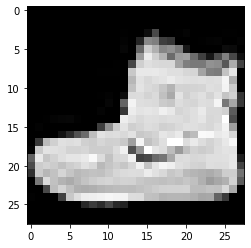

In [9]:
plt.imshow(X_train[0] , cmap='gray' )
plt.show()

In [11]:
y_train[0]

9

In [14]:
X_train = X_train / 255.0

In [17]:
X_test = X_test / 255.0

In [18]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [19]:
28*28

784

### Reshaping of the dataset



In [21]:
X_train.shape

(60000, 28, 28)

In [22]:
28*28

784

In [24]:
X_train = X_train.reshape(60000, 784 )

In [25]:
X_test.shape

(10000, 28, 28)

In [26]:
X_test = X_test.reshape(10000, 784)

In [27]:
X_train.shape

(60000, 784)

In [28]:
X_test.shape

(10000, 784)

## Stage 4: Building an Artificial Neural network

### Defining the model



In [29]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [30]:
from keras.layers import Flatten

In [31]:
X_train.shape

(60000, 784)

In [33]:
from keras.layers import Dropout

In [34]:
def build_model():
  model = Sequential()
  model.add( Dense(128, 'relu' , input_shape=(784, ) ) )
  model.add( Dropout(0.2)  )
  model.add( Dense(64, 'relu') )
  model.add( Dense(10, 'softmax'))
  model.compile('adam', 'sparse_categorical_crossentropy', ['accuracy'])
  return model

### Adding the first layer (Dense layer)

Layer hyper-parameters:
- number of units/neurons: 128
- activation function: ReLU
- input_shape: (784, )

### Adding a Dropout layer 



In [ ]:
# 드랍아웃이란, 뉴런에 연결된 선을, 일부분을 잘라서, 학습이 잘 되도록 하는 방법

### Adding the second layer (output layer)

- units == number of classes (10 in the case of Fashion MNIST)
- activation = 'softmax'

### Comiling the model

- Optimizer: Adam
- Loss: Sparse softmax (categorical) crossentropy 

### Training the model

In [35]:
model = build_model()

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 밸리데이션 데이터를 따로 준비한 경우에, 사용하는 파라미터

In [37]:
epoch_history = model.fit(X_train, y_train, epochs=10, 
                          validation_data= ( X_test, y_test )   )

Epoch 1/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.5381 - accuracy: 0.8074 - val_loss: 0.4212 - val_accuracy: 0.8481
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4031 - accuracy: 0.8525 - val_loss: 0.3884 - val_accuracy: 0.8606
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3685 - accuracy: 0.8656 - val_loss: 0.4024 - val_accuracy: 0.8553
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3488 - accuracy: 0.8715 - val_loss: 0.3633 - val_accuracy: 0.8711
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3354 - accuracy: 0.8755 - val_loss: 0.3461 - val_accuracy: 0.8739
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3201 - accuracy: 0.8816 - val_loss: 0.3555 - val_accuracy: 0.8763
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3119 - accuracy: 0.8835 - val_loss: 0.3369 - val_accuracy:

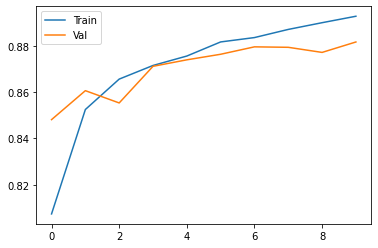

In [38]:
plt.plot(epoch_history.history['accuracy'])
plt.plot(epoch_history.history['val_accuracy'])
plt.legend(['Train', 'Val'])
plt.show()

### Model evaluation and prediction

In [39]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.3346 - accuracy: 0.8816


[0.3345622420310974, 0.881600022315979]

## Stage 5 : Saving the model

### Saving the architecture 

### Saving network weights